# <centre> EDA Project on  "The Titanic Wreck" <centre/>


<img src="https://raw.githubusercontent.com/insaid2018/Tableau/master/Data/titanic11.jpg"/>

## Table of Contents

1. [Objective](#section1)<br>
2. [Importing Packages and Collecting Data](#section2)
3. [Data Profiling & Preprocessing](#section3)
    - 3.1 [Pre Profiling](#section301)<br/>
    - 3.2 [Preprocessing](#section302)<br/>
    - 3.3 [Post Profiling](#section303)<br/>
4. [Analysis Through Data Visualization](#section4)
    - 4.1 [What is Total Count of Survivals and Victims?](#section401)<br/>
    - 4.2 [Which Gender has more Survival rate?](#section402)<br/>
    - 4.3 [What is Survival rate based on Person type(Male,female,Child)](#section403)<br/>
    - 4.4 [Did Economy Class had an impact on Survival?](#section404)<br/>
    - 4.5 [What is the Survival probaility based on Embarkment of Passengers?](#section405)<br/>
    - 4.6 [How is Fare distributed for the Passengers?](#section406)<br/>
    - 4.7 [What was Average Fare by Pclass & Embark location?](#section407)<br/>
    - 4.8 [ Segment Age in bins with size of 20.Also Correlate Age with Survival.](#section408)<br/>
    - 4.9 [ Did Solo Traveller has less chances of Survival?](#section409)<br/>
    - 4.10 [How did Total family size affected Survival Count?](#section410)<br/>
    - 4.11 [How can you correlate Pclass/Age/fare with Survival rate?](#section411)<br/>
    - 4.12 [Which features had most Impact on Survival rate? ](#section412)<br/>
5. [Conclusions](#section5)<br/>  

# Objective



The objective here is to conduct Exploratory data analysis **(EDA)** on the Titanic Dataset in order to gather insights and evenutally predicting survior on basics of factors like Class ,Sex , Age , Gender ,Pclass etc.

**Why EDA?**
   - An approach to summarize, visualize, and become intimately familiar with the important characteristics of a data set.
   - Defines and Refines the selection of feature variables that will be used for machine learning.
   - Helps to find hidden Insights
   - It provides the context needed to develop an appropriate model with minimum errors


**About Event**

The RMS Titanic was a British passenger liner that **sank** in the **North Atlantic Ocean** in the early morning hours of **15 April 1912**, after it collided with an iceberg during its maiden voyage from **Southampton** to **New York City**. There were an estimated **2,224** passengers and crew aboard the ship, and more than **1,500** died, making it one of the deadliest commercial peacetime maritime disasters in modern history.
This sensational tragedy shocked the international community and led to better safety regulations for ships.




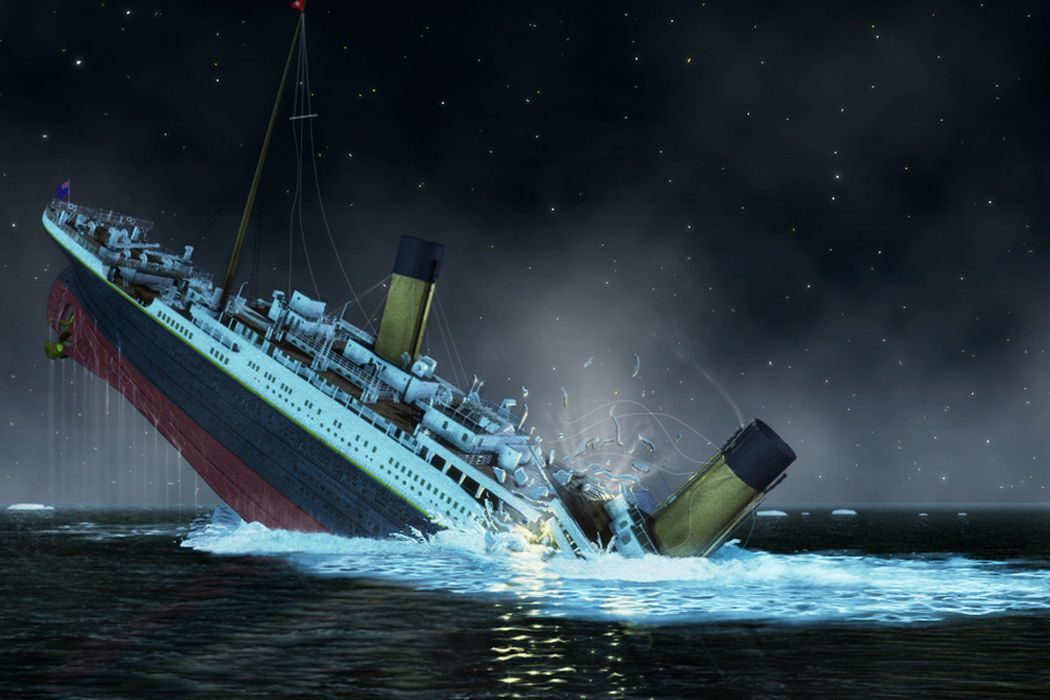

### 2. Data  Description

The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc.
The dataset comprises of 891 observations of 12 columns. Below is a table showing names of all the columns and their description.


| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| PassengerId   | Passenger Identity                                        | 
| Survived      | Survival (0 = No; 1 = Yes)                                |  
| Pclass        | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)               | 
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Cabin         | Cabin number                                              |
|Embarkment     | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)|

In [1]:
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns #Visualization
%matplotlib inline 
sns.set()
import warnings # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 
from matplotlib.pyplot import pie, axis, show #visualizations

**Importing Data**

In [2]:
Titanic_data=pd.read_csv(r"C:\Users\suyashi144893\Documents\data Sets\titanic.csv")

In [3]:
Titanic_data.head(2)

PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   

      Sex   Age  SibSp  Parch     Fare Cabin Embarked  
0    male  22.0      1      0   7.2500   NaN        S  
1  female  38.0      1      0  71.2833   C85        C

In [4]:
Titanic_data.tail(1)

PassengerId  Survived                 Name   Sex   Age  SibSp  Parch  \
890          891         0  Dooley, Mr. Patrick  male  32.0      0      0   

     Fare Cabin Embarked  
890  7.75   NaN        Q

# **Examining Data**

In [5]:
Titanic_data.shape #shows total number of rows and columns in data set

(891, 10)

In [6]:
Titanic_data.drop_duplicates(subset=None,keep="first",inplace=False)

PassengerId  Survived                                               Name  \
0              1         0                            Braund, Mr. Owen Harris   
1              2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3         1                             Heikkinen, Miss. Laina   
3              4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5         0                           Allen, Mr. William Henry   
..           ...       ...                                                ...   
886          887         0                              Montvila, Rev. Juozas   
887          888         1                       Graham, Miss. Margaret Edith   
888          889         0           Johnston, Miss. Catherine Helen "Carrie"   
889          890         1                              Behr, Mr. Karl Howell   
890          891         0                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch     Fare Cabin Embarked  
0      male  22.0      1      0   7.2500   NaN        S  
1    female  38.0      1      0  71.2833   C85        C  
2    female  26.0      0      0   7.9250   NaN        S  
3    female  35.0      1      0  53.1000  C123        S  
4      male  35.0      0      0   8.0500   NaN        S  
..      ...   ...    ...    ...      ...   ...      ...  
886    male  27.0      0      0  13.0000   NaN        S  
887  female  19.0      0      0  30.0000   B42        S  
888  female   NaN      1      2  23.4500   NaN        S  
889    male  26.0      0      0  30.0000  C148        C  
890    male  32.0      0      0   7.7500   NaN        Q  

[891 rows x 10 columns]

In [7]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [8]:
Titanic_data['PassengerId'] = Titanic_data['PassengerId'].astype(str)
#Titanic_data['Pclass'] = Titanic_data['Pclass'].astype(str)

In [9]:
Titanic_data.describe()#(include='all')

Survived         Age       SibSp       Parch        Fare
count  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838   29.699118    0.523008    0.381594   32.204208
std      0.486592   14.526497    1.102743    0.806057   49.693429
min      0.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000   80.000000    8.000000    6.000000  512.329200

In [10]:
Titanic_data.describe(include='object') 

PassengerId                     Name   Sex    Cabin Embarked
count          891                      891   891      204      889
unique         891                      891     2      147        3
top              1  Braund, Mr. Owen Harris  male  B96 B98        S
freq             1                        1   577        4      644


**Insights**:

1.Total samples are **891** or **40%** of the actual number of passengers on board the Titanic **(2,224)**


2.Survived is a categorical feature with 0 or 1 values

3.Around **38%** samples survived representative of the actual survival rate at **32%**

4.Fares varied significantly with few passengers (<1%) paying as high as $512.

5.Few elderly passengers (<1%) within age range **65-80**.

6. More numbers of **males**


# Data Preprocessing

1. Check for Errors and Null Values

2. Replace Null Values with appropriate values

3. Drop down features that are incomplete and are not too relevant for analysis

4. Create new features that can would help to improve prediction 

**Check for null or empty values in Data**

In [11]:
sum_null=Titanic_data.isnull().sum()
per_null= (Titanic_data.isnull().sum()/len(Titanic_data))*100
miss_data=pd.concat([sum_null,per_null],axis=1,keys=['Total','%'])
miss_data

Total          %
PassengerId      0   0.000000
Survived         0   0.000000
Name             0   0.000000
Sex              0   0.000000
Age            177  19.865320
SibSp            0   0.000000
Parch            0   0.000000
Fare             0   0.000000
Cabin          687  77.104377
Embarked         2   0.224467

The Age, Cabin and Embarked have null values.Lets fix them

**Filling missing age by median**

In [12]:
new_age = Titanic_data.Age.median()  
Titanic_data.Age.fillna(new_age, inplace = True)
#Titanic_test.Age.fillna(new_age, inplace = True)

**Filling missing Embarked by mode**

In [13]:
Titanic_data.Embarked = Titanic_data.Embarked.fillna(Titanic_data['Embarked'].mode()[0])
#Titanic_test.Embarked = Titanic_test.Embarked.fillna(Titanic_data['Embarked'].mode()[0])

**Cabin feature may be dropped as it is highly incomplete or contains many null values**

In [14]:
Titanic_data.drop('Cabin', axis = 1,inplace = True)

**PassengerId  Feature may be dropped from training dataset as it does not contribute to survival**

In [15]:
miss1=Titanic_data.isnull().sum()
miss= (Titanic_data.isnull().sum()/len(Titanic_data))*100
miss_data=pd.concat([miss1,miss],axis=1,keys=['Total','%'])
miss_data

Total    %
PassengerId      0  0.0
Survived         0  0.0
Name             0  0.0
Sex              0  0.0
Age              0  0.0
SibSp            0  0.0
Parch            0  0.0
Fare             0  0.0
Embarked         0  0.0

In [16]:
Titanic_data

PassengerId  Survived                                               Name  \
0             1         0                            Braund, Mr. Owen Harris   
1             2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2             3         1                             Heikkinen, Miss. Laina   
3             4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4             5         0                           Allen, Mr. William Henry   
..          ...       ...                                                ...   
886         887         0                              Montvila, Rev. Juozas   
887         888         1                       Graham, Miss. Margaret Edith   
888         889         0           Johnston, Miss. Catherine Helen "Carrie"   
889         890         1                              Behr, Mr. Karl Howell   
890         891         0                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch     Fare Embarked  
0      male  22.0      1      0   7.2500        S  
1    female  38.0      1      0  71.2833        C  
2    female  26.0      0      0   7.9250        S  
3    female  35.0      1      0  53.1000        S  
4      male  35.0      0      0   8.0500        S  
..      ...   ...    ...    ...      ...      ...  
886    male  27.0      0      0  13.0000        S  
887  female  19.0      0      0  30.0000        S  
888  female  28.0      1      2  23.4500        S  
889    male  26.0      0      0  30.0000        C  
890    male  32.0      0      0   7.7500        Q  

[891 rows x 9 columns]

# Feature Engineering:Creating New Fields

1. Create New Age Bands to improve  prediction Insights

2. Create a new feature called Family based on Parch and SibSp to get total count of family members on board

3. Create a Fare range feature if it helps our analysis

**AGE-BAND**

In [17]:
Titanic_data['Age_band']=0
Titanic_data.loc[Titanic_data['Age']<=1.5,'Age_band']="Infant"
Titanic_data.loc[(Titanic_data['Age']>1.5)&(Titanic_data['Age']<=12),'Age_band']="Children"
Titanic_data.loc[Titanic_data['Age']>12,'Age_band']="Adults"
Titanic_data.head(1)

PassengerId  Survived                     Name   Sex   Age  SibSp  Parch  \
0           1         0  Braund, Mr. Owen Harris  male  22.0      1      0   

   Fare Embarked Age_band  
0  7.25        S   Adults

**Fare-Band**

In [18]:
Titanic_data['FareBand']=0
Titanic_data.loc[(Titanic_data['Fare']>=0)&(Titanic_data['Fare']<=14),'FareBand']="L"
Titanic_data.loc[(Titanic_data['Fare']>14)&(Titanic_data['Fare']<=30),'FareBand']="M"
Titanic_data.loc[Titanic_data['Fare']>30,'FareBand']="H"
Titanic_data.head(1) 

PassengerId  Survived                     Name   Sex   Age  SibSp  Parch  \
0           1         0  Braund, Mr. Owen Harris  male  22.0      1      0   

   Fare Embarked Age_band FareBand  
0  7.25        S   Adults        L

- We can convert the categorical titles to ordinal.


**Insights**

- Most titles band Age groups accurately. For example: Master title has Age mean of 5 years.
- Survival among Title Age bands varies slightly.
- Certain titles mostly survived (Mme, Lady, Sir) or did not (Don, Rev, Jonkheer).

### Decision
#### We decide to retain the new Title feature for model training


### Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.

- Converting Sex feature to a new feature called Gender where female=1 and male=0.

In [19]:
#titanic.drop_duplicates()

**Extracting Titles Now we can drop down Name feature**

In [20]:
Titanic_data.drop('Name', axis = 1,inplace = True)

- We can also create an artificial feature combining Pclass and Age.

# Post Pandas Profiling : Checking Data after data preparation

In [21]:
Titanic_data.head()

PassengerId  Survived     Sex   Age  SibSp  Parch     Fare Embarked  \
0           1         0    male  22.0      1      0   7.2500        S   
1           2         1  female  38.0      1      0  71.2833        C   
2           3         1  female  26.0      0      0   7.9250        S   
3           4         1  female  35.0      1      0  53.1000        S   
4           5         0    male  35.0      0      0   8.0500        S   

  Age_band FareBand  
0   Adults        L  
1   Adults        H  
2   Adults        L  
3   Adults        H  
4   Adults        L

In [22]:
Titanic_data.head()

PassengerId  Survived     Sex   Age  SibSp  Parch     Fare Embarked  \
0           1         0    male  22.0      1      0   7.2500        S   
1           2         1  female  38.0      1      0  71.2833        C   
2           3         1  female  26.0      0      0   7.9250        S   
3           4         1  female  35.0      1      0  53.1000        S   
4           5         0    male  35.0      0      0   8.0500        S   

  Age_band FareBand  
0   Adults        L  
1   Adults        H  
2   Adults        L  
3   Adults        H  
4   Adults        L

In [23]:
Titanic_data['Gender'] = Titanic_data['Sex'].map({'male': 0, 'female': 1})
Titanic_data

PassengerId  Survived     Sex   Age  SibSp  Parch     Fare Embarked  \
0             1         0    male  22.0      1      0   7.2500        S   
1             2         1  female  38.0      1      0  71.2833        C   
2             3         1  female  26.0      0      0   7.9250        S   
3             4         1  female  35.0      1      0  53.1000        S   
4             5         0    male  35.0      0      0   8.0500        S   
..          ...       ...     ...   ...    ...    ...      ...      ...   
886         887         0    male  27.0      0      0  13.0000        S   
887         888         1  female  19.0      0      0  30.0000        S   
888         889         0  female  28.0      1      2  23.4500        S   
889         890         1    male  26.0      0      0  30.0000        C   
890         891         0    male  32.0      0      0   7.7500        Q   

    Age_band FareBand  Gender  
0     Adults        L       0  
1     Adults        H       1  
2     Adults        L       1  
3     Adults        H       1  
4     Adults        L       0  
..       ...      ...     ...  
886   Adults        L       0  
887   Adults        M       1  
888   Adults        M       1  
889   Adults        M       0  
890   Adults        L       0  

[891 rows x 11 columns]

In [24]:
T2=pd.read_excel("Titanic2.xlsx")
T2.head(1)

PassengerId  Pclass
0            1       3

In [26]:
T2['PassengerId'] = T2['PassengerId'].astype(str)

In [27]:
Titanic_data = pd.merge(Titanic_data, T2, on='PassengerId', how='inner')
Titanic_data.head()

PassengerId  Survived     Sex   Age  SibSp  Parch     Fare Embarked  \
0           1         0    male  22.0      1      0   7.2500        S   
1           2         1  female  38.0      1      0  71.2833        C   
2           3         1  female  26.0      0      0   7.9250        S   
3           4         1  female  35.0      1      0  53.1000        S   
4           5         0    male  35.0      0      0   8.0500        S   

  Age_band FareBand  Gender  Pclass  
0   Adults        L       0       3  
1   Adults        H       1       1  
2   Adults        L       1       3  
3   Adults        H       1       1  
4   Adults        L       0       3

# Data Visualization

4.1 **What is Total Count of Survivals and Victims?**

In [28]:
Titanic_data.groupby(['Survived'])['Survived'].count()# similar functions unique(),sum(),mean() etc

Survived
0    549
1    342
Name: Survived, dtype: int64

##  Insight- 549 passengers died and 342 Passengers managed to survive

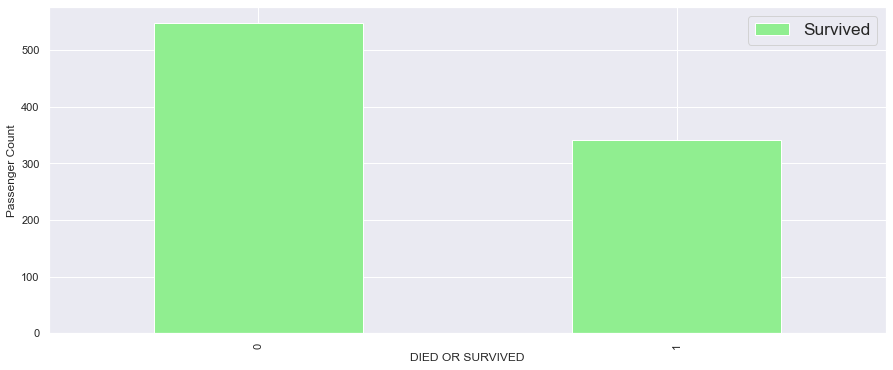

In [33]:
plt = Titanic_data.Survived.value_counts().plot(kind='bar',color="lightgreen",figsize=(15,6))
plt.set_xlabel('DIED OR SURVIVED')
plt.set_ylabel('Passenger Count')
plt.legend(fontsize='x-large')

**Insights** 
- Only 342 Passengers Survived out of 891
- Majority Died which conveys there were less chances of Survival

--------------------------------------------------------------------------------------------------

4.2 **Which gender has more survival rate?**

In [34]:
#Titanic_data.groupby(['Survived', 'Sex']).count()["Age"]
Titanic_data.groupby(['Survived', 'Sex']).count()["Age"]

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Age, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

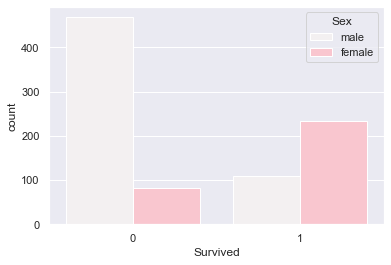

In [36]:
sns.countplot('Survived',data=Titanic_data,hue='Sex',color="pink",saturation=0.80)


In [37]:
import plotly.express as p

# Creating the bar chart
fig = p.bar(Titanic_data, x='Survived', y="Sex",color='Sex',)

fig.show()

<AxesSubplot:xlabel='Sex'>

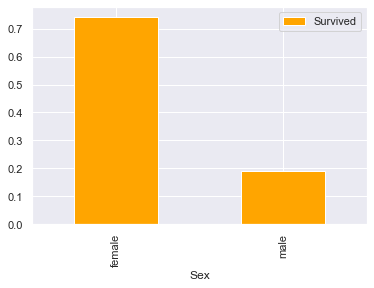

In [38]:
Titanic_data[['Sex','Survived']].groupby(['Sex']).mean().plot(kind='bar',color="Orange")

**Insights**

-  Female has better chances of Survival "LADIES FIRST"
-  There were more males as compared to females ,but most of them died.

4.3 **What is Survival rate based on Person type?**

In [39]:
Titanic_data.groupby(['Survived', 'Age_band']).count()['Sex']

Survived  Age_band
0         Adults      520
          Children     27
          Infant        2
1         Adults      302
          Children     28
          Infant       12
Name: Sex, dtype: int64

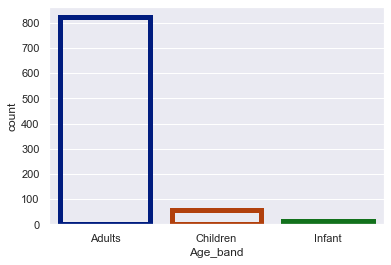

In [40]:
ax = sns.countplot(x="Age_band", data=Titanic_data,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

In [ ]:
g = sns.catplot(x="Sex", hue="Age_band", col="Survived",
                data=Titanic_data, kind="count",
                height=4, aspect=.9);

(-0.325, 1.325, 0.0, 576.45)

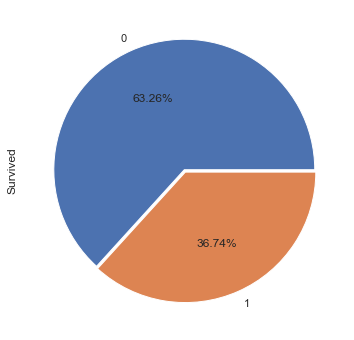

In [41]:
Titanic_data[Titanic_data['Age_band'] == 'Adults'].Survived.groupby(Titanic_data.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.02],autopct='%1.2f%%')
plt.axis('equal')
#plt.legend(["Died","Survived"])
#plt.set_title("Adult survival rate")
#plt.show()





(-0.325, 1.325, 0.0, 576.45)

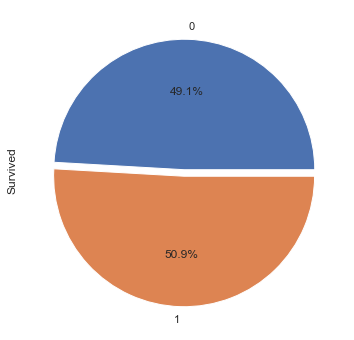

In [42]:
Titanic_data[Titanic_data['Age_band'] == 'Children'].Survived.groupby(Titanic_data.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
#plt.legend(["Died","Survived"])
#plt.set_title("Child survival rate")
#plt.show()

------------------------------------------**CHILD-SURVIVAL RATE**--------------------------------------------------------------

(-0.325, 1.325, 0.0, 576.45)

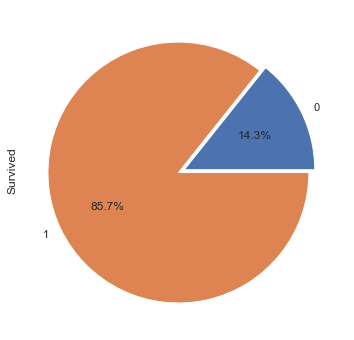

In [43]:
Titanic_data[Titanic_data['Age_band'] == 'Infant'].Survived.groupby(Titanic_data.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
#plt.legend(["Died","Survived"])
#plt.set_title("Infant survival rate")
#plt.show()

In [44]:
import plotly.express as px


fig = px.pie(Titanic_data, names="Age_band",values="Survived",color_discrete_sequence=px.colors.sequential.RdBu,opacity=0.8, hole=0.6)
fig.show()

**Insights** 

- Majority Passengers  were  Adults

- Almost half of the total number of children survived.

- Most of the Adults failed to Survive

- More than 85percent of Infant Survived


4.4 **Did Economy Class had an impact on survival rate?**

In [ ]:
Titanic_data.groupby(['Pclass', 'Survived'])['Survived'].count()

In [ ]:
sns.countplot('Pclass',data=Titanic_data,color="green")


In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

In [ ]:
plt.figure(figsize=(15, 15))
sns.set_style('ticks')  # change background to white background
sns.regplot(x='Fare', y='Age', data=Titanic_data, color='blue',marker="*")
plt.show()

In [ ]:
sns.barplot('Pclass','Survived', data=Titanic_data,hue="Sex",color="purple")

**Insights**

- Most of the passengers travelled in Third class but only 24per of them survived

- If we talk about survival ,more passengers in First class survived and again female given more priority

- Economic Class affected Survival rate and Passengers travelling with First Class had higher ratio of survival as compared to Class 2 and 3.

4.5 **What is Survival Propability based on Embarkment of passengers?**

Titanic’s first voyage was to New York before sailing to the Atlantic Ocean it picked passengers from three ports Cherbourg(C), Queenstown(Q), Southampton(S). Most of the Passengers in Titanicic embarked from the port of Southampton.Lets see how embarkemt affected survival probability.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

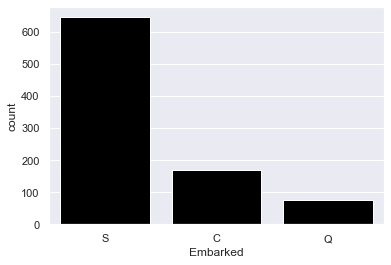

In [45]:

sns.countplot('Embarked',data=Titanic_data,color="black")



Text(0, 0.5, 'Survival Probability')

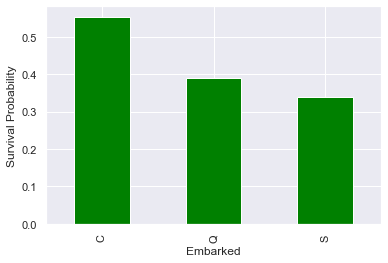

In [46]:
plt = Titanic_data[['Embarked', 'Survived']].groupby('Embarked').mean().Survived.plot(kind="bar",color="green")
plt.set_xlabel('Embarked')
plt.set_ylabel('Survival Probability')

**Gender Survival based on Embarkment and Pclass**

In [47]:
pd.crosstab([Titanic_data.Sex, Titanic_data.Survived,Titanic_data.Pclass],[Titanic_data.Embarked], margins=True)

Embarked                  C   Q    S  All
Sex    Survived Pclass                   
female 0        1         1   0    2    3
                2         0   0    6    6
                3         8   9   55   72
       1        1        42   1   48   91
                2         7   2   61   70
                3        15  24   33   72
male   0        1        25   1   51   77
                2         8   1   82   91
                3        33  36  231  300
       1        1        17   0   28   45
                2         2   0   15   17
                3        10   3   34   47
All                     168  77  646  891

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

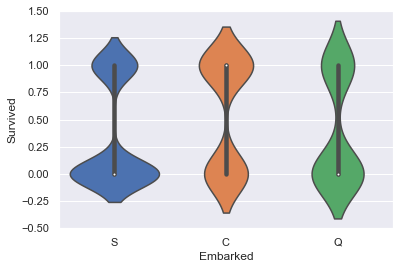

In [48]:
sns.violinplot(x='Embarked',y='Survived',data=Titanic_data,split=True,saturation=1)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

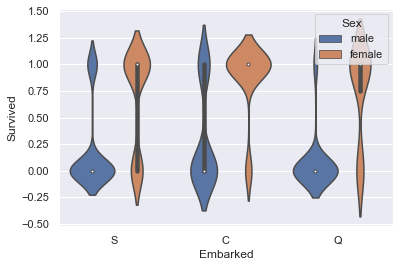

In [49]:
sns.violinplot(x="Embarked", y="Survived", hue="Sex",
        aspect=.8,
             data=Titanic_data)

**Insights:**

- Most Passengers from port C Survived.

- Most Passengers were from  Southampton(S).

- Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.

- Males had better survival rate in Port C when compared for  S and Q ports.
- Females had least Survival rate in Q



4.6 **How is Fare distributed for  Passesngers?**

In [ ]:
Titanic_data['Fare'].min()

In [ ]:
Titanic_data['Fare'].max()

In [ ]:
Titanic_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

In [ ]:
Titanic_data.groupby(['FareBand', 'Survived'])['Survived'].count()

In [ ]:
sns.swarmplot(x='Survived', y='Fare', data=Titanic_data,color="green") 

**Insights**

- Majority Passenger's fare lies in 0-100 dollars range
- Passengers who paid more Fares had more chances of Survival
- Fare as high as 514 dollars was purcharsed by very few.(Outlier)

4.7 **What was Average fare by Pclass & Embark location?**

In [ ]:
sns.boxplot(x="Pclass", y="Fare", data=Titanic_data)

**Insights**

- First Class Passengers paid major part of total Fare.
- Passengers who Embarked from Port C paid Highest Fare

4.8 **Segment Age in bins with size of 10**

In [ ]:
plt=Titanic_data['Age'].hist(bins=10)
plt.set_ylabel('Passengers')
plt.set_xlabel('Age of Passengers')
plt.set_title('Age Distribution of Titanic Passengers',size=10, y=.5)

Insights:
- The youngest passenger on the Titanic were toddlers under 6 months
- The oldest were of 80 years of age. 
- The mean for passengers was a bit over 29 years i.e there were more young passengers in the ship.

**Lets see how Age has correlation with Survival**

In [ ]:

sns.distplot(Titanic_data[Titanic_data['Survived']==1]['Age'])

In [ ]:
sns.distplot(Titanic_data[Titanic_data['Survived']==0]['Age'])

In [ ]:
sns.violinplot(x='Sex',y='Age',hue='Survived',data=Titanic_data,split=True)

**Insights**
- Most of the passengers died.
- Majority of passengers were between 25-40,most of them died
- Female are more likely to survival 

4.9 **Did Solo Passenger has less chances of Survival ?**

In [ ]:
Titanic_data 

In [ ]:
Titanic_data['FamilySize']=0
Titanic_data['FamilySize']=1+Titanic_data['Parch']+Titanic_data['SibSp']
Titanic_data['SoloPassenger']=0
Titanic_data.loc[Titanic_data.FamilySize==1,'SoloPassenger']=1

In [ ]:
Titanic_data.head()

In [ ]:
sns.factorplot('SoloPassenger','Survived',data=Titanic_data)

In [ ]:
sns.factorplot('SoloPassenger','Survived',hue='Pclass',col="Embarked",data=Titanic_data)

**Insights**

- Most of the Passengers were travelling Solo and most of them died
- Solo Females were more likely to Survive as compared to males
- Passengers Class have a positive correlation with Solo Passenger Survival
- Passengers Embarked from Port Q had Fifty -Fifty  Chances of Survival 


4.10 **How did total family size affected Survival Count**?

In [ ]:
sns.violinplot('SoloPassenger','Survived',hue='Pclass',data=Titanic_data)

In [ ]:
for i in Titanic_data:
    Titanic_data['FamilySize'] = Titanic_data['SibSp'] + Titanic_data['Parch'] + 1

Titanic_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
sns.barplot(x='FamilySize', y='Survived', data=Titanic_data,ci= None )

**Insights**
- Both men and women had a massive drop of survival with a FamilySize over 4. 
- The chance to survive as a man increased with FamilySize until a size of 4
- Men are not likely to Survive with FamilySize 5 and 6
- Big Size Family less likihood of Survival

4.11 **How can you correlate Pclass/Age/Fare with Survival rate?**

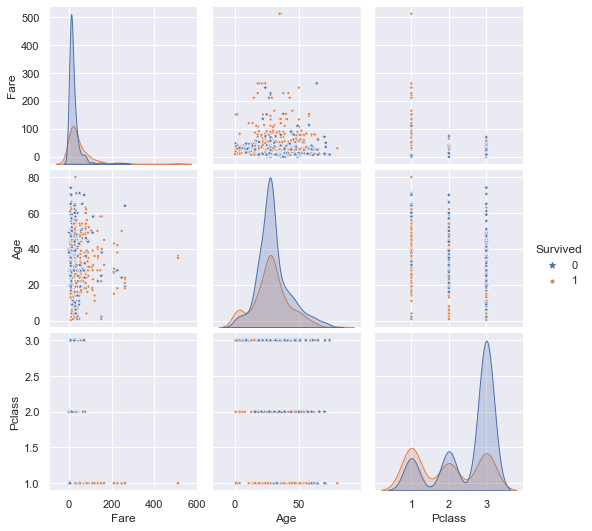

In [50]:
sns.pairplot(Titanic_data[["Fare","Age","Pclass","Survived"]],vars= ["Fare","Age","Pclass"],hue="Survived", dropna=True,markers=["*", "."])
#plt.set_title('Pair Plot')

Insights:

- Fare and Survival has positive correlation

- We cannt relate age and Survival as majority of travellers were of mid age

- Higher Class Passengers had more likeihood of Survival


4.12 **Which features had most impact on Survival rate?**

In [ ]:
sns.heatmap(Titanic_data.corr().round(2),annot=True)
#p = Titanic_data.corr("Sex")
#print (p)

**Insights**:

- Older women have higher rate of survival than older men . Also, older women has higher rate of survival than younger women; an opposite trend to the one for the male passengers.
- All the features are not necessary to predict Survival
- More Features creates Complexitity 
- Fare has positive Correlation
- For Females major Survival Chances , only for port C males had more likeihood of Survival.


# Conclusion : "If you were young female travelling in First Class and embarked from port -C then you had best chances of Survival in Titanic"

-  Most of the Passengers Died
- "Ladies & Children First" i.e **76% of Females and 16% of Children** Survived
-  Gender , Passenger type & Classs are mostly realted to Survival.
-  Survival rate diminishes significantly for Solo  Passengers
-  Majority of Male Died
-  Males with Family had better Survival rate as compared to Solo Males

******************************************************************************************************************************

# Part -2

# <center>Machine Learning </center>       

## Table of Contents
1. [Logistic Regression](#section1)<br/>
2. [KNN or k-Nearest Neighbors](#section2)<br/>
3. [Support Vector Machines](#section3)<br/>
4. [Naive Bayes classifier](#section4)<br/>
5. [Decision Tree](#section5)<br/>
6. [Random Forrest](#section6)<br/>
7. [Perceptron](#section7)<br/>
8. [Artificial neural network](#section8)<br/>
9. [RVM or Relevance Vector Machine](#section9)<br/>



<a id=section1></f> 
## Importing Machine Learning Packages

In [ ]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
# Data vizualization package
import pandas as pd 
import numpy as np
import random as rnd

In [ ]:
Titanic_data.head()

In [ ]:
Titanic_data['Age_band']=0
Titanic_data.loc[Titanic_data['Age']<=1,'Age_band']=1
Titanic_data.loc[(Titanic_data['Age']>1)&(Titanic_data['Age']<=12),'Age_band']=2
Titanic_data.loc[Titanic_data['Age']>12,'Age_band']=3
Titanic_data.head(2)

### Analyze by pivoting features¶

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (Sex), ordinal (Pclass) or discrete (SibSp, Parch) type.

- **Pclass**: We observe significant correlation (>0.5) among Pclass=1 and Survived (classifying #3). We decide to include this feature in our model.
- **Sex** :We confirm the observation during problem definition that Sex=female had very high survival rate at 74% (classifying #1).
- **SibSp and Parch** : These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features (creating #1).

In [ ]:
Titanic_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
Titanic_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
Titanic_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)


#### Observations form EDA on Categorical Features

- Female passengers had much better survival rate than males.  **Classifying** .
- Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
- Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports.**Correlatring**
- Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. **Correlating**.

#### Decisions.
- Add Sex feature to model training.
- Complete and add Embarked feature to model training.

 There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Here our problem is a **classification** and **regression** problem.

#### Lets identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port) and perform a category of machine learning which is called supervised learning 

<a id=section1></f> 
## 1. Logistic Regression

- Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome.
- Logistic Regression is used when the dependent variable(target) is categorical.
- Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split  
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
X_titanic = Titanic_data.drop("Survived", axis=1)
Y_titanic = Titanic_data["Survived"]


In [ ]:
#Titanic_test  = Titanic_test.drop("PassengerId", axis=1)
Titanic_test.head()

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_titanic, Y_titanic)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_titanic, Y_titanic) * 100, 2)
acc_log

- **We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function**.

In [ ]:
coeff_df = pd.DataFrame(Titanic_data.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)


Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

#### Insights 
- Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
- Inversely as Pclass increases, probability of Survived=1 decreases the most.
- This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
- So is Title as second highest positive correlation.

###  Support Vector Machines(SVM)
 Support-vector machines also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for **classification** and **regression analysis**.

In [ ]:

svc = SVC()
svc.fit(X_titanic, Y_titanic)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

### k-Nearest Neighbors algorithm
In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

### Naive Bayes
Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. 

The model generated confidence score is the lowest among the models evaluated so far.

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

### Perceptron
The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time.

In [ ]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron